In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

In [3]:
df = pd.read_csv("Time Series COVID-19 Confirmed Global - Regression Task - Data.csv")
df.head()

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,3/18/2020,3/19/2020,3/20/2020,3/21/2020,3/22/2020,3/23/2020,3/24/2020,3/25/2020,3/26/2020,3/27/2020
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,22,22,24,24,40,40,74,84,94,110
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,59,64,70,76,89,104,123,146,174,186
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,74,87,90,139,201,230,264,302,367,409
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,39,53,75,88,113,133,164,188,224,267
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,1,2,2,3,3,3,4,4


In [4]:
df = df[df['Country/Region'] == 'Thailand']
df.head()

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,3/18/2020,3/19/2020,3/20/2020,3/21/2020,3/22/2020,3/23/2020,3/24/2020,3/25/2020,3/26/2020,3/27/2020
209,NaN,Thailand,15.0,101.0,2,3,5,7,8,8,...,212,272,322,411,599,721,827,934,1045,1136


In [14]:
df.values[0][4:]

array([2, 3, 5, 7, 8, 8, 14, 14, 14, 19, 19, 19, 19, 25, 25, 25, 25, 32,
       32, 32, 33, 33, 33, 33, 33, 34, 35, 35, 35, 35, 35, 35, 35, 35, 37,
       40, 40, 41, 42, 42, 43, 43, 43, 47, 48, 50, 50, 50, 53, 59, 70, 75,
       82, 114, 147, 177, 212, 272, 322, 411, 599, 721, 827, 934, 1045,
       1136], dtype=object)

In [18]:
df

,Time,n,t
0,2020-01-22,2,737446
1,2020-01-23,3,737447
2,2020-01-24,5,737448
3,2020-01-25,7,737449
4,2020-01-26,8,737450
...,...,...,...
61,2020-03-23,721,737507
62,2020-03-24,827,737508
63,2020-03-25,934,737509
64,2020-03-26,1045,737510


In [17]:
df = pd.DataFrame({
    'Time': pd.to_datetime(df.columns[4:]),
    'n': df.values[0][4:].astype(np.int)
})

df['t'] = df.Time.apply(lambda x: x.toordinal())

In [23]:
df.head()

,Time,n,t
0,2020-01-22,2,737446
1,2020-01-23,3,737447
2,2020-01-24,5,737448
3,2020-01-25,7,737449
4,2020-01-26,8,737450


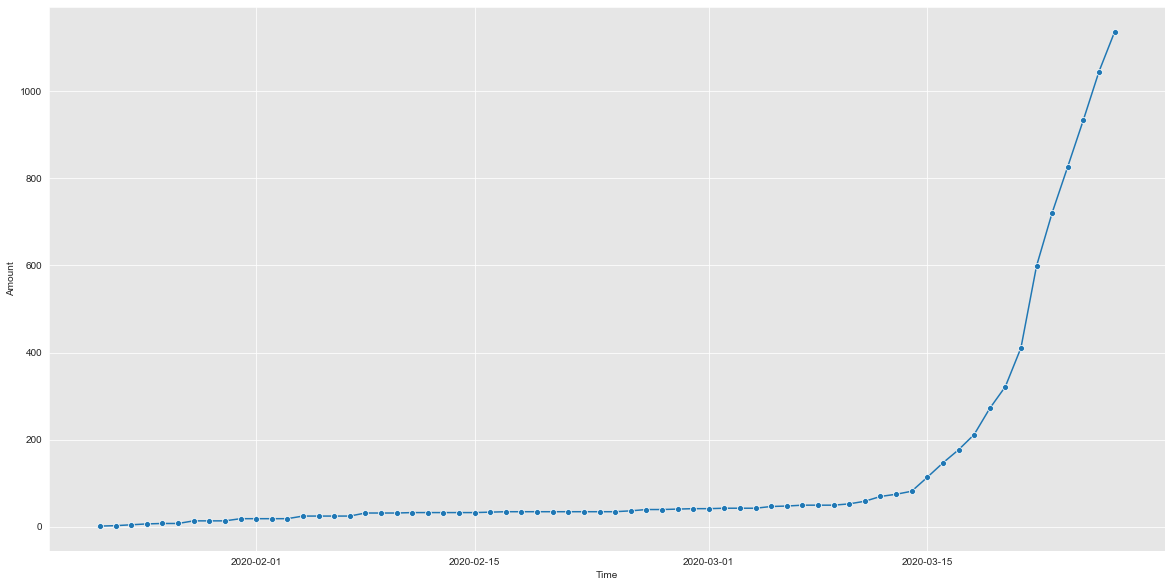

In [27]:
plt.figure(figsize=(20, 10))
sns.lineplot(marker = 'o', 
             x = df.Time, 
             y = df.n, 
             legend=False)
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

In [28]:
df2 = df.copy()

In [32]:
df2['Time']

0    2020-01-22
1    2020-01-23
2    2020-01-24
3    2020-01-25
4    2020-01-26
        ...    
61   2020-03-23
62   2020-03-24
63   2020-03-25
64   2020-03-26
65   2020-03-27
Name: Time, Length: 66, dtype: datetime64[ns]

In [31]:
df2['Time'] - pd.to_timedelta(7, unit='d')

0    2020-01-15
1    2020-01-16
2    2020-01-17
3    2020-01-18
4    2020-01-19
        ...    
61   2020-03-16
62   2020-03-17
63   2020-03-18
64   2020-03-19
65   2020-03-20
Name: Time, Length: 66, dtype: datetime64[ns]

In [29]:
pd.to_timedelta(7, unit='d')

Timedelta('7 days 00:00:00')

In [ ]:
df2['Time'] = df2['Time'] - pd.to_timedelta